### Multivariate Multistep Time Series Forecasting using Stacked LSTM sequence to sequence Autoencoder in Tensorflow 2.0 / Keras 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os

#plotting and analysis library
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import pandas as pd
#model library
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM, Input, Dropout
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import L1L2
import time
from scipy.stats import spearmanr

In [2]:
df=pd.read_csv("Discharge7_H1.csv")
attrib=['name','cycle','datetime','ambient_temp','capacity','voltage_measured','current_measured','temperature_measured','time','TIEDVD']
param = ['TIEDVD']
dataset_f=df[param]

In [3]:
dataset_df = df[attrib]
dataset_df.describe()

,cycle,ambient_temp,capacity,voltage_measured,current_measured,temperature_measured,time,TIEDVD
count,168.000000,168.0,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,84.500000,24.0,1.644421,3.040739,-0.345021,39.149155,3129.523887,1961.174333
std,48.641546,0.0,0.160950,0.470270,0.752762,0.763337,246.654499,337.109465
min,1.000000,24.0,1.400455,1.813269,-1.990881,36.680603,2792.485000,1433.016000
25%,42.750000,24.0,1.498058,2.971141,-0.004506,38.660578,2901.343750,1658.168000
50%,84.500000,24.0,1.616125,3.278985,-0.002570,39.225007,3086.078000,1911.133000
75%,126.250000,24.0,1.812005,3.343130,-0.001238,39.636430,3323.230750,2316.163250
max,168.000000,24.0,1.891052,3.428899,0.002132,41.049942,3690.234000,2451.203000


In [4]:
spearman_df = df[['capacity', 'TIEDVD']]
rho, p = spearmanr(spearman_df)
print (rho)
print(p)

0.9967048152216279
5.043363220384667e-183


In [5]:
corr = dataset_df.corr()
round(corr,2)

,cycle,ambient_temp,capacity,voltage_measured,current_measured,temperature_measured,time,TIEDVD
cycle,1.00,NaN,-0.99,0.68,0.46,-0.00,-0.98,-0.99
ambient_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capacity,-0.99,NaN,1.00,-0.74,-0.52,-0.02,0.98,1.00
voltage_measured,0.68,NaN,-0.74,1.00,0.95,0.02,-0.65,-0.75
current_measured,0.46,NaN,-0.52,0.95,1.00,0.05,-0.42,-0.53
temperature_measured,-0.00,NaN,-0.02,0.02,0.05,1.00,-0.12,0.01
time,-0.98,NaN,0.98,-0.65,-0.42,-0.12,1.00,0.97
TIEDVD,-0.99,NaN,1.00,-0.75,-0.53,0.01,0.97,1.00


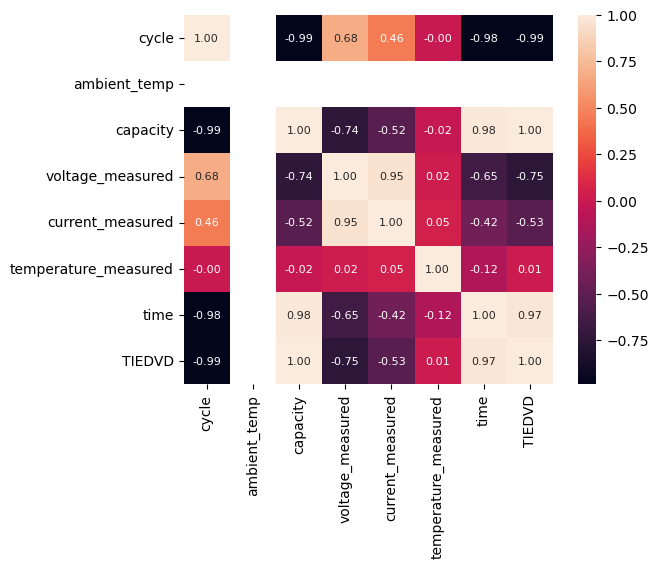

In [6]:
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8});

In [7]:
spearman_df = dataset_df[['capacity', 'TIEDVD']]
rho, p = spearmanr(spearman_df)
print (rho)
print(p)

0.9967048152216279
5.043363220384667e-183


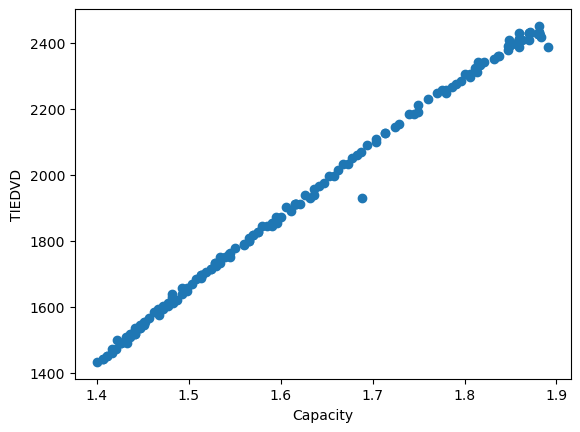

In [8]:
plt.scatter(dataset_df[['capacity']], dataset_df[['TIEDVD']])
plt.ylabel('TIEDVD')
plt.xlabel('Capacity')
plt.show()

In [9]:
dataset_df = dataset_df.replace(to_replace=(1929.953), value=(2100))

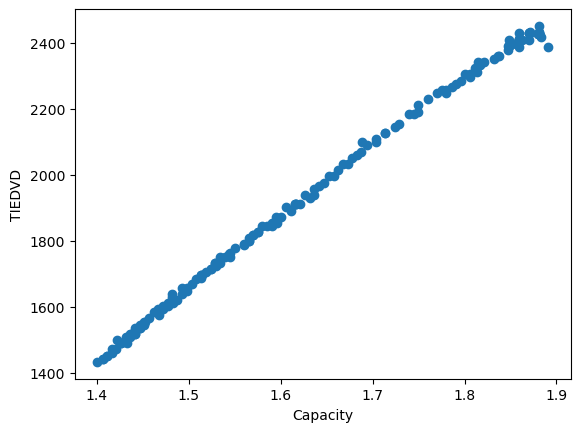

In [10]:
plt.scatter(dataset_df[['capacity']], dataset_df[['TIEDVD']])
plt.ylabel('TIEDVD')
plt.xlabel('Capacity')
plt.show()

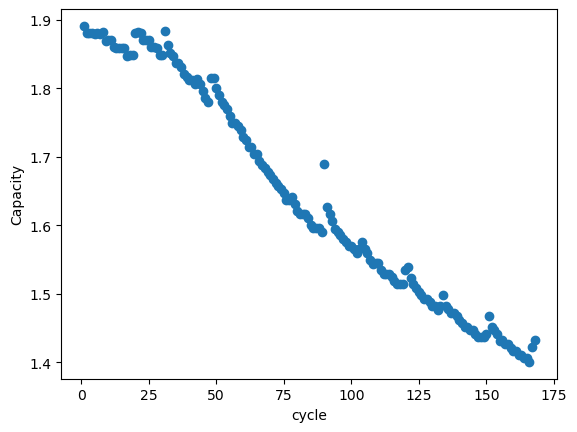

In [11]:
plt.scatter(dataset_df[['cycle']], dataset_df[['capacity']])
plt.ylabel('Capacity')
plt.xlabel('cycle')
plt.show()

In [12]:
%matplotlib qt
plot_df = df.loc[(df['cycle']>=1),['cycle','TIEDVD']]
sns.set_style("white")
plt.figure(figsize=(10, 5))
plt.plot(plot_df['cycle'], plot_df['TIEDVD'], label="Real data", color='black')
plt.ylabel('TIEDVD', family='serif',fontsize=16)
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Siklus', family='serif',fontsize=16)
plt.title('Kurva Indirect Health Indicator Baterai B0007', family='serif',fontsize=20)

Text(0.5, 1.0, 'Kurva Indirect Health Indicator Baterai B0007')

In [13]:
datas_cap=dataset_df['capacity']
datas_TIEDVD=dataset_df['TIEDVD']
z=np.polyfit(datas_TIEDVD,datas_cap,1)
print(z)

[4.76662594e-04 7.09120486e-01]


In [14]:
l1=[]
for i in range(len(datas_TIEDVD)):
    xx=(z[0] * datas_TIEDVD[i])+z[1]
    l1.append(xx)
df['fit']=l1

In [15]:
plot_df = df.loc[(df['cycle']>=1),['cycle','capacity']]
plot_df1 = df.loc[(df['cycle']>=1),['cycle','fit']]


sns.set_style("white")
plt.figure(figsize=(10, 5))
plt.plot(plot_df['cycle'], plot_df['capacity'],color='red')
plt.plot(plot_df1['cycle'], plot_df1['fit'],'-',color='blue')

plt.ylabel('Capacity', family='serif', fontsize=16)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
#adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Cycle',family='serif', fontsize=16)
plt.title('Mapping',family='serif', fontsize=20)

Text(0.5, 1.0, 'Mapping')

In [16]:
plot_df = df.loc[(df['cycle']>=1),['cycle','capacity']]
sns.set_style("white")
plt.figure(figsize=(10, 5))
plt.plot(plot_df['cycle'], plot_df['capacity'], label="Real data", color='black')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
#Draw threshold
plt.plot([0.,168], [1.4, 1.4], color='red')
plt.ylabel('Kapasitas',family='serif',fontsize=16)
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Siklus', family='serif',fontsize=16)
plt.title('Degradasi Baterai B0007',family='serif', fontsize=20)

Text(0.5, 1.0, 'Degradasi Baterai B0007')

In [17]:
# For this case, let's assume that
# Given past 10 days observation, forecast the next 5 days observations. 
n_past = 5
n_future = 1 
n_features = 1

Train - Test Split

In [18]:
l_train =84
train_df,test_df = dataset_f[0:l_train], dataset_f[l_train:]  # 50% and 50%
train_df.shape,test_df.shape

((84, 1), (84, 1))

Scaling the values for faster training of the models.

In [19]:
train = train_df
scalers={}

for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s

test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

C:\Users\user\AppData\Local\Temp\ipykernel_21744\3260478294.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
C:\Users\user\AppData\Local\Temp\ipykernel_21744\3260478294.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i]=s_s


**Converting the series to samples for supervised learning**

In [20]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [21]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))

X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

**Model Architecture**

E2D2 ==> Sequence to Sequence Model with two encoder layers and two decoder layers. 

In [22]:
# E2D2
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(300,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(300, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(300, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(300, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 5, 300),     362400      ['input_1[0][0]']                
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                                  
 lstm_1 (LSTM)                  [(None, 300),        721200      ['lstm[0][0]']                   
                                 (None, 300),                                                 

 **Training the models**


In [23]:
st = time.time()
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)

model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=32,callbacks=[reduce_lr], verbose =0)

In [24]:
et = time.time()
elapsed_time = et - st
print('Execution time: %.3f'% elapsed_time, 'seconds')

Execution time: 18.600 seconds


In [25]:
plt.plot(history_e2d2.history['loss'])
plt.plot(history_e2d2.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

Prediction on validation set

In [26]:
data_total=pd.concat((train,test),axis=0)
inputs=data_total[len(data_total)-len(test)-n_past:].values

In [27]:
X_test=[]
for i in range(n_past,len(inputs)):
    X_test.append(inputs[i-n_past:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [28]:
pred=model_e2d2.predict(X_test)
for index,i in enumerate(test_df.columns):
    scaler = scalers['scaler_'+i]
   
    pred[:,:,index]=scaler.inverse_transform(pred[:,:,index])
pred=pred.reshape(len(X_test),-1)
pred=pred[:,0]

In [29]:
#Mapping the results#################
fitting=df[(df['cycle']>l_train)]
fitting=fitting['capacity']
abc=np.array(fitting)
## abc == Capacity
fitting=fitting.values
#test=per
cap=np.array(pred)
li=[]
z=np.polyfit(cap,abc,1)
z

array([4.97404029e-04, 6.76945150e-01])

In [30]:
li=[]
for i in range(len(abc)):
    xx=(cap[i] *4.76662594e-04) + 7.09120486e-01
    li.append(xx)
print(len(li))
tests=df[(df['cycle']>l_train)]
tests['Perdict']=li
#per=test
#per['per']=li
###############################

rmse = np.sqrt(mean_squared_error(tests['capacity'],tests['Perdict']))
mae = (mean_absolute_error(tests['capacity'],tests['Perdict']))
R2 = (metrics.r2_score(tests['capacity'],tests['Perdict']))
print('Test MAE: %.3f' % mae)
print('Test RMSE: %.3f' % rmse)

print("R^2 = %.3f" % R2 )

84
Test MAE: 0.009
Test RMSE: 0.016
R^2 = 0.937


C:\Users\user\AppData\Local\Temp\ipykernel_21744\3361778310.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tests['Perdict']=li


In [31]:
%matplotlib qt
ln = len(train)
k = ln+1
sns.set_style("white")
test['pre']=pred
plot_df = df.loc[(df['cycle']>=1),['cycle','capacity']]
plot_per = tests.loc[(tests['cycle']>=ln),['cycle','Perdict']]
plt.figure(figsize=(10, 5))
plt.plot(plot_df['cycle'], plot_df['capacity'], label="Aktual", color='black')
plt.plot(plot_per['cycle'],plot_per['Perdict'],label="Prediksi", color='red')
#Draw threshold
plt.plot([0.,168], [1.45, 1.45], label="EOL", color = 'blue')
plt.plot([k,k], [1.9, 1.38], label="Starting Point", color = 'orange', linestyle='dashed')
plt.ylabel('Kapasitas', fontsize=16)
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Siklus', family='serif',fontsize=16)
plt.legend()
plt.title('Prediksi Degradasi Baterai B0007 Mulai Siklus ke-%.0f' % k, family='serif',fontsize=20)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

C:\Users\user\AppData\Local\Temp\ipykernel_21744\683406163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pre']=pred


In [32]:
actual=0
pred=0
Afil=0
Pfil=0
a=tests['capacity'].values
b=tests['Perdict'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.45:
        j=i
        Afil=j
        break
for i in range(len(a)):
    pred=b[i]
    if pred<1.45:
        k=i
        Pfil=k
        break
print("RUL Actual Battery: "+ str(Afil+1))
print("RUL Predicted Battery: "+ str(Pfil+1))
print("The Actual fail at cycle number: "+ str(Afil+ln+1))
print("The prediction fail at cycle number: "+ str(Pfil+ln+1))
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

RUL Actual Battery: 60
RUL Predicted Battery: 61
The Actual fail at cycle number: 144
The prediction fail at cycle number: 145
The error of RUL= 1 Cycle(s)


In [33]:
print('%.3f' % mae)
print('%.3f' % rmse)
print('%.3f' % R2 )
print (RULerror)
print('%.3f' % elapsed_time)

0.009
0.016
0.937
1
18.600
